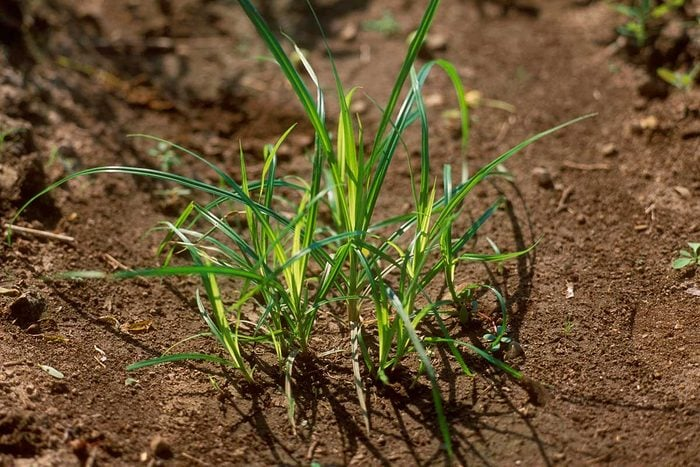

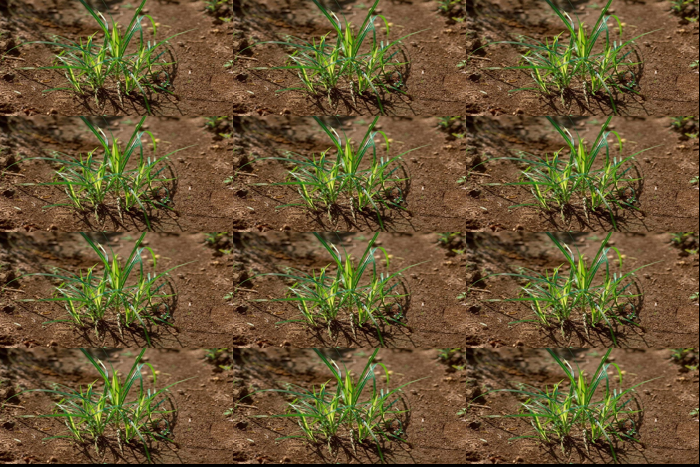

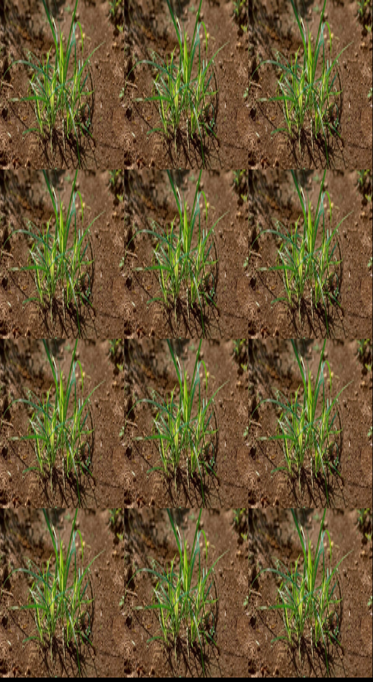

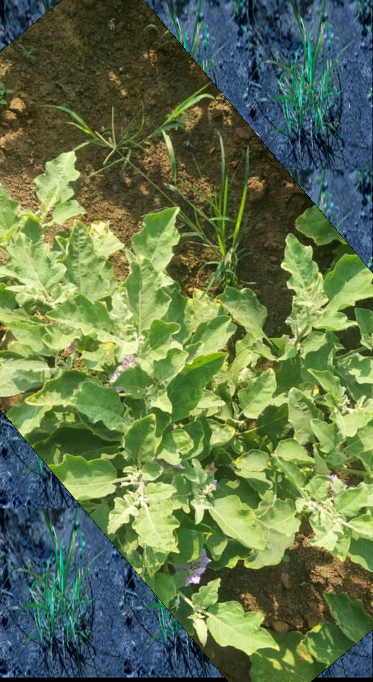

In [42]:
from PIL import Image
import os
from IPython.display import display, Image as IPImage  # Import display and Image from IPython.display
import cv2
import numpy as np

# Define the input path for the original image and factors for resizing
input_path = r"C:\Users\bejja\OneDrive\Desktop\PATCH\patch_download_1.jpg"
wt = 3
ht = 4

# Open the original image and resize it
original_image = Image.open(input_path)
original_width, original_height = original_image.size
small_width = original_width // wt
small_height = original_height // ht
resized_image = original_image.resize((small_width, small_height))

# Create a new blank image with the same size as the original image
combined_image = Image.new("RGB", (original_width, original_height))

# Paste the resized image in a grid
for i in range(ht):
    for j in range(wt):
        combined_image.paste(resized_image, (small_width * j, small_height * i))

# Display the original image and the combined image
display(original_image)
display(combined_image)
image_path = r"C:\DataAugmentation-8\OriginalImages\Image1.jpg"
rotation_angle = 40

# Load images
origin = cv2.imread(image_path)

# Get dimensions of origin image
height, width, _ = origin.shape
center = (width // 2, height // 2)

# Compute rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)

# Perform rotation on origin image
rotated_image = cv2.warpAffine(origin, rotation_matrix, (width, height), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))

# Convert rotated image to grayscale
gray_rotated = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

# Threshold grayscale image to create binary mask
_, binary_mask = cv2.threshold(gray_rotated, 1, 255, cv2.THRESH_BINARY_INV)

# Use the previously created combined_image as the patch image
# Resize combined_image to match rotated image size
combined_image_resized = combined_image.resize((width, height))

# Convert combined_image to numpy array
combined_image_np = np.array(combined_image_resized)

# Overlay combined_image onto rotated image using the binary mask
for i in range(3):  # Loop over the color channels
    rotated_image[:, :, i][binary_mask == 255] = combined_image_np[:, :, i][binary_mask == 255]

# Convert BGR image to RGB for displaying with PIL
rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

# Convert numpy array back to PIL Image
final_image = Image.fromarray(rotated_image_rgb)

# Display the final overlaid image in the notebook
display(combined_image_resized)
display(final_image)

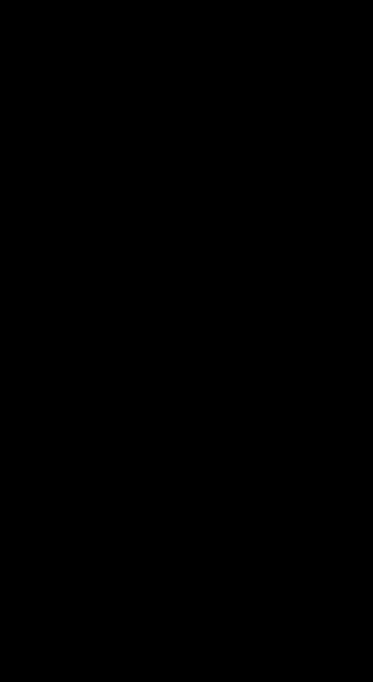

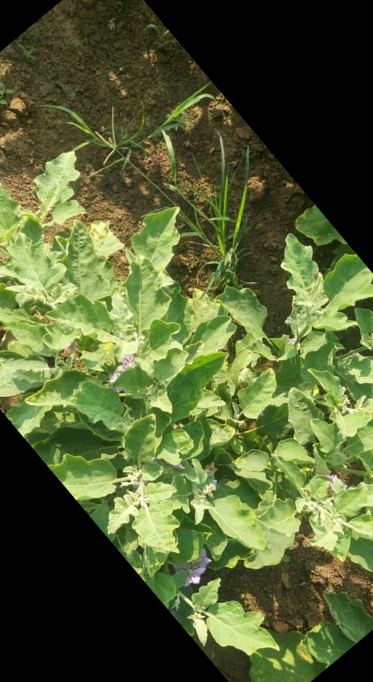

In [41]:
image_path = r"C:\DataAugmentation-8\OriginalImages\Image1.jpg"
rotation_angle = 40

# Load images
origin = cv2.imread(image_path)

# Get dimensions of origin image
height, width, _ = origin.shape
center = (width // 2, height // 2)

# Compute rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)

# Perform rotation on origin image
rotated_image = cv2.warpAffine(origin, rotation_matrix, (width, height), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))

# Convert rotated image to grayscale
gray_rotated = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

# Threshold grayscale image to create binary mask
_, binary_mask = cv2.threshold(gray_rotated, 1, 255, cv2.THRESH_BINARY_INV)

# Use the previously created combined_image as the patch image
# Resize combined_image to match rotated image size
combined_image_resized = combined_image.resize((width, height))

# Convert combined_image to numpy array
combined_image_np = np.array(combined_image_resized)

# Overlay combined_image onto rotated image using the binary mask
for i in range(3):  # Loop over the color channels
    rotated_image[:, :, i][binary_mask == 255] = combined_image_np[:, :, i][binary_mask == 255]

# Convert BGR image to RGB for displaying with PIL
rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

# Convert numpy array back to PIL Image
final_image = Image.fromarray(rotated_image_rgb)

# Display the final overlaid image in the notebook
display(combined_image_resized)
display(final_image)

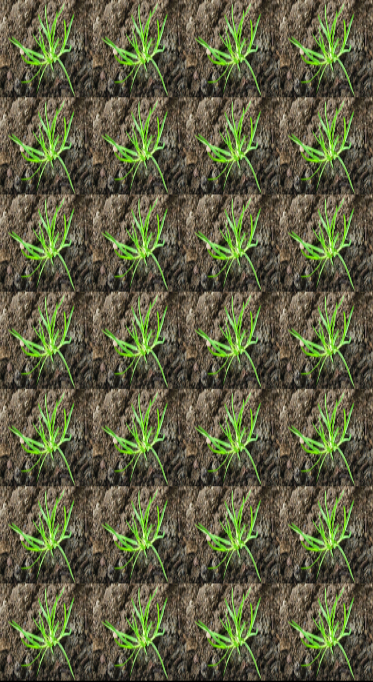

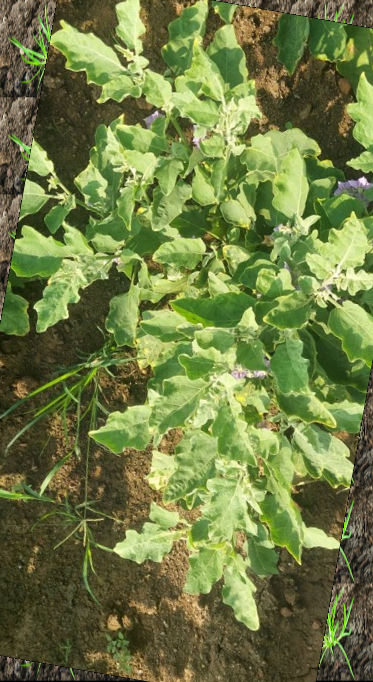

Image saved to C:\Users\bejja\OneDrive\Desktop\short_patch\tile_4x7_sample_image_rotated_170.png


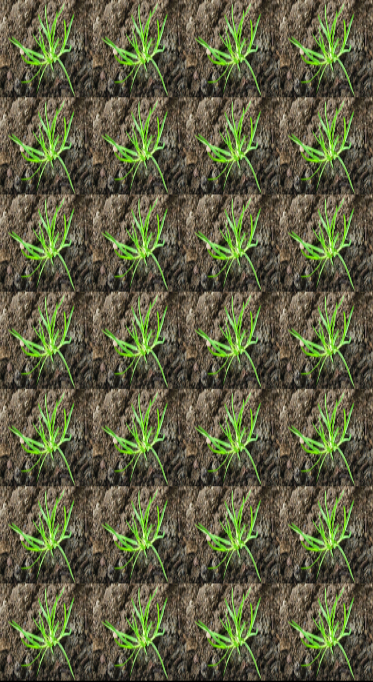

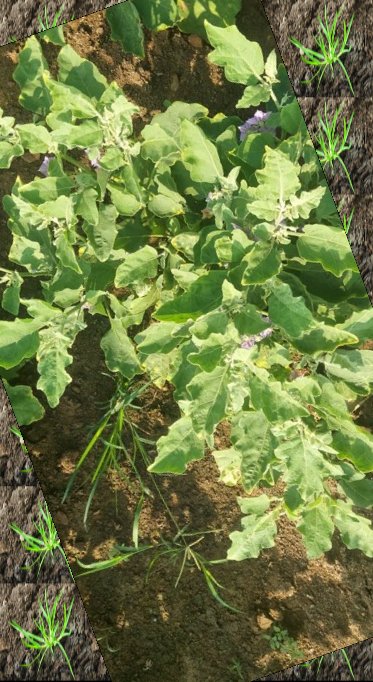

Image saved to C:\Users\bejja\OneDrive\Desktop\short_patch\tile_4x7_sample_image_rotated_200.png


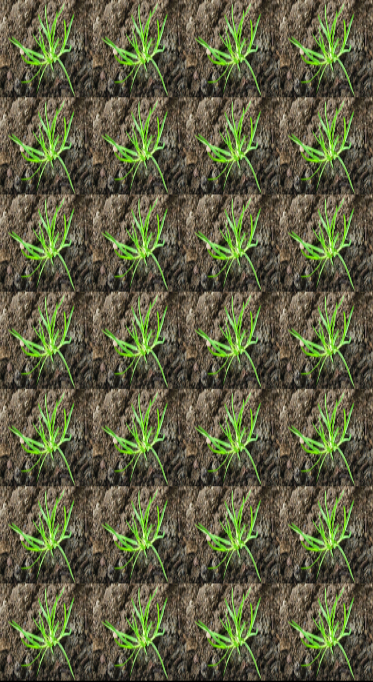

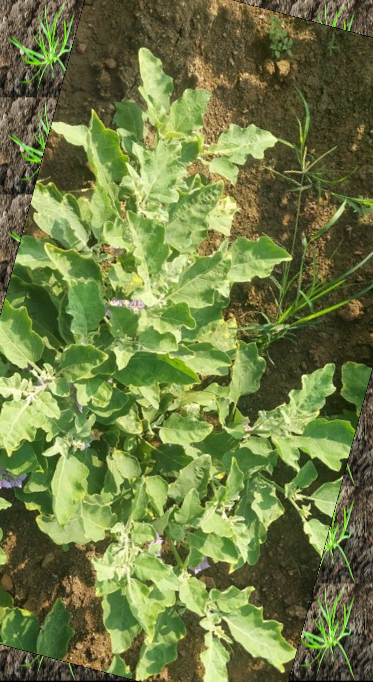

Image saved to C:\Users\bejja\OneDrive\Desktop\short_patch\tile_4x7_sample_image_rotated_345.png


In [8]:
from PIL import Image
import cv2
import os
import numpy as np
from IPython.display import display
leo=[170,200,345]
# Define the input paths and factors for resizing
for rotation_angle in leo:
    input_path = r"C:\Users\bejja\Downloads\Annual poa_1.jpeg"
    image_path = r"C:\DataAugmentation-8\OriginalImages\Image1.jpg"
    wt = 4
    ht = 7

    # Open the original image and resize it
    original_image = Image.open(input_path)
    original_width, original_height = original_image.size
    small_width = original_width // wt
    small_height = original_height // ht
    resized_image = original_image.resize((small_width, small_height))

    # Create a new blank image with the same size as the original image
    combined_image = Image.new("RGB", (original_width, original_height))

    # Paste the resized image in a grid
    for i in range(ht):
        for j in range(wt):
            combined_image.paste(resized_image, (small_width * j, small_height * i))

    # Load and rotate the image
    origin = cv2.imread(image_path)
    height, width, _ = origin.shape
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
    rotated_image = cv2.warpAffine(origin, rotation_matrix, (width, height), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))

    # Ensure both images are in RGB color space
    rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
    combined_image_rgb = np.array(combined_image.convert('RGB'))

    # Resize combined_image to match rotated image size
    combined_image_resized = cv2.resize(combined_image_rgb, (width, height))

    # Create binary mask from rotated image
    gray_rotated = cv2.cvtColor(rotated_image_rgb, cv2.COLOR_RGB2GRAY)
    _, binary_mask = cv2.threshold(gray_rotated, 1, 255, cv2.THRESH_BINARY_INV)

    # Overlay combined_image onto rotated image using the binary mask
    result = rotated_image_rgb.copy()
    result[binary_mask == 255] = combined_image_resized[binary_mask == 255]

    # Convert result back to PIL Image
    final_image = Image.fromarray(result)
    combined_image_resized1=Image.fromarray(combined_image_resized)

    # Display the images
    display(combined_image_resized1)
    display(final_image)
    save_path = r'C:\Users\bejja\OneDrive\Desktop\short_patch'
    os.makedirs(save_path, exist_ok=True)
    # Create a sample image (for example purposes, we will create a simple red image)
    image = final_image

    # Define the full path to save the image

    file_path = os.path.join(save_path, f'tile_{wt}x{ht}_sample_image_rotated_{rotation_angle}.png')
    count = 1
    while os.path.exists(file_path):
        file_path = os.path.join(save_path, f'tile_{wt}x{ht}_sample_image_rotated_{rotation_angle}.png')
        count += 1

    # Save the image
    image.save(file_path)

    print(f"Image saved to {file_path}")
